In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from collections import Counter

## Instantiate a model with parameters

In [2]:
# Network selection
g = nx.watts_strogatz_graph(n=20, k=4, p=0.1) # p=1 -> all-to-all connectivity
# g = nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(), nodetype=int)

# Dynamical Model Configuration
model = ep.SIRModel(g)

cfg = mc.Configuration()
cfg.add_model_parameter('beta', 0.5)
cfg.add_model_parameter('gamma', 0.1)
cfg.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(cfg)



### Network characteristics

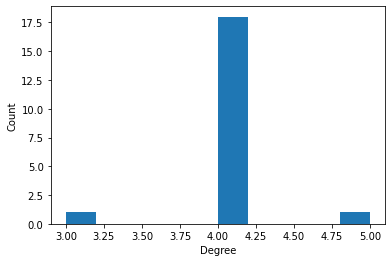

In [3]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()
# Degree destribution
plot_degree_dist(g)

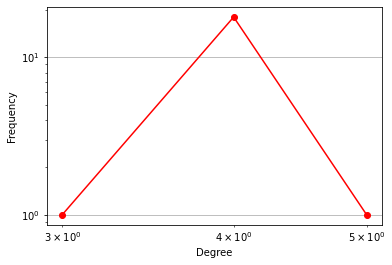

In [4]:
degrees = [g.degree(n) for n in g.nodes()]
# print(degrees)
degree_counts = Counter(degrees)

keys = sorted(degree_counts.keys())
# print(keys)
values = [degree_counts[k] for k in keys]
# print(values)
# values = [float(i) / sum(values) for i in values]

plt.loglog(keys, values, 'ro-')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [5]:
N, K = g.order(), g.size()
avg_deg = float(K) / N
print("Nodes: ", N)
print("Edges: ", K)
print("Average degree: ", avg_deg)

Nodes:  20
Edges:  40
Average degree:  2.0


## Simulation execution

In [6]:
number_of_iteration = 10
iterations = model.iteration_bunch(number_of_iteration)

100%|██████████| 10/10 [00:00<00:00, 15448.63it/s]


## Visualisation

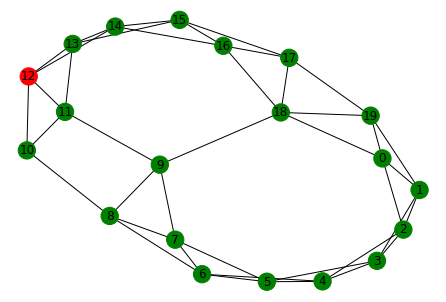

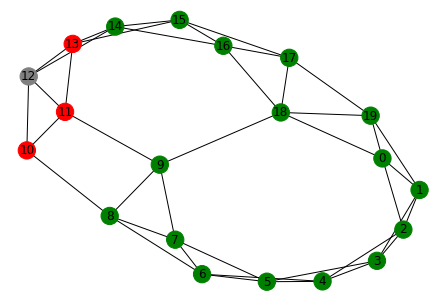

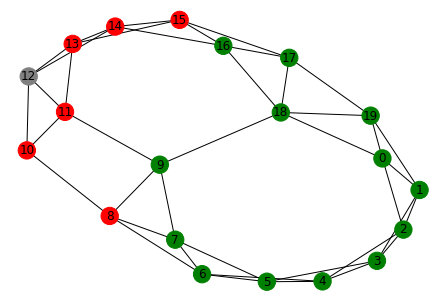

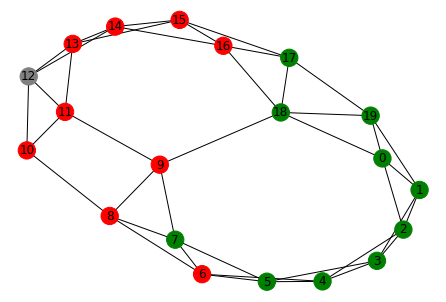

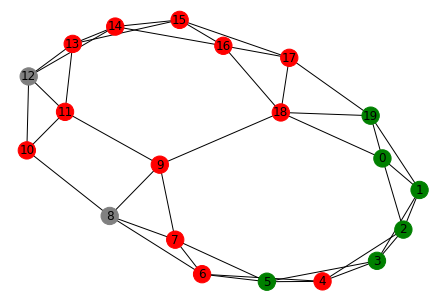

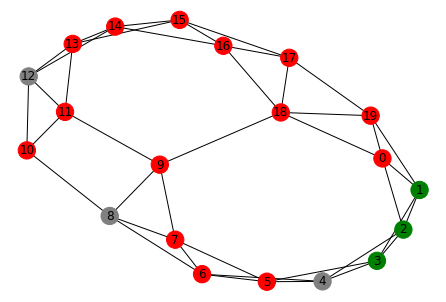

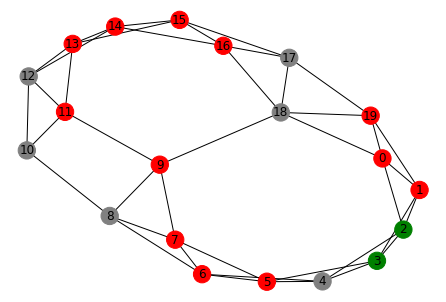

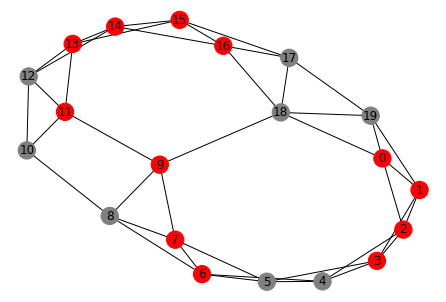

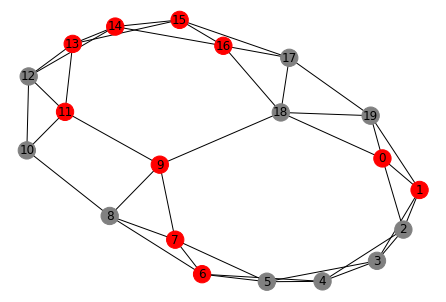

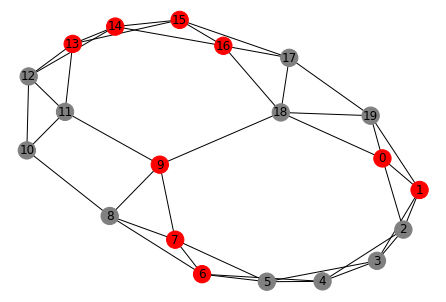

In [7]:
positions = nx.spring_layout(g)
color_map = []
for iteration in range(g.number_of_nodes()):
    color_map.append('green')

for iteration in iterations:
    for index, status in iteration['status'].items():
        if status == 1:
            color_map[index] = 'red'
        if status == 2:
            color_map[index] = 'grey'

    nx.draw(g, positions, node_color=color_map, with_labels=True)
    plt.show()